In [16]:
# Imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

                        # Modelo 5

# Carregar o dataset
df = pd.read_csv("produtos_agricolas.csv")
# Exibir as primeiras linhas do DataFrame
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
# Mostra informações gerais sobre a base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Número de dados duplicados: 0


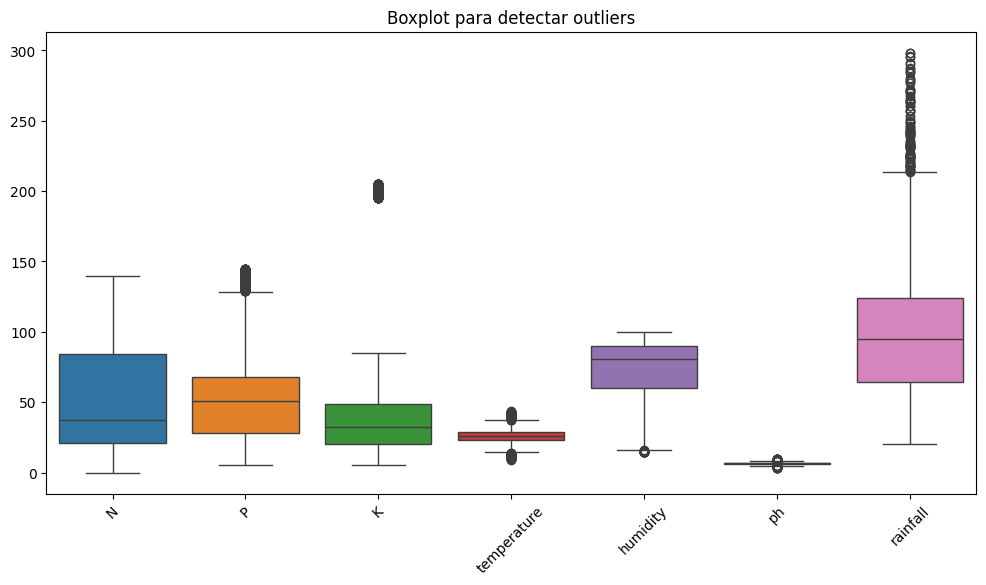

In [4]:
# Imprime informações relevantes à limpeza
# Verificar a presença de dados duplicados
duplicates = df.duplicated().sum()
print("Número de dados duplicados:", duplicates)
# Verificar a presença de outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot para detectar outliers")
plt.xticks(rotation=45)
plt.show()

In [5]:
# Ver últimas linhas
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
df.columns = ['q_nitrogenio', 'q_fosforo', 'q_potassio', 'temperatura', 'umidade', 'ph_solo', 'precipitacao_mm', 'tipo_cultura']
df


,q_nitrogenio,q_fosforo,q_potassio,temperatura,umidade,ph_solo,precipitacao_mm,tipo_cultura
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [9]:
df.shape
df.dtypes
#Informações gerais (conta nulos + tipo da coluna + memória)
df.info()
#visualizar valores nulos
df.isnull().sum()
coluna = df['tipo_cultura'].value_counts()
print(coluna)
colunas = df[['q_nitrogenio', 'umidade']]
print(colunas)
ordem_cresc = df.sort_values(by = 'q_fosforo')
print(ordem_cresc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   q_nitrogenio     2200 non-null   int64  
 1   q_fosforo        2200 non-null   int64  
 2   q_potassio       2200 non-null   int64  
 3   temperatura      2200 non-null   float64
 4   umidade          2200 non-null   float64
 5   ph_solo          2200 non-null   float64
 6   precipitacao_mm  2200 non-null   float64
 7   tipo_cultura     2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
tipo_cultura
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        

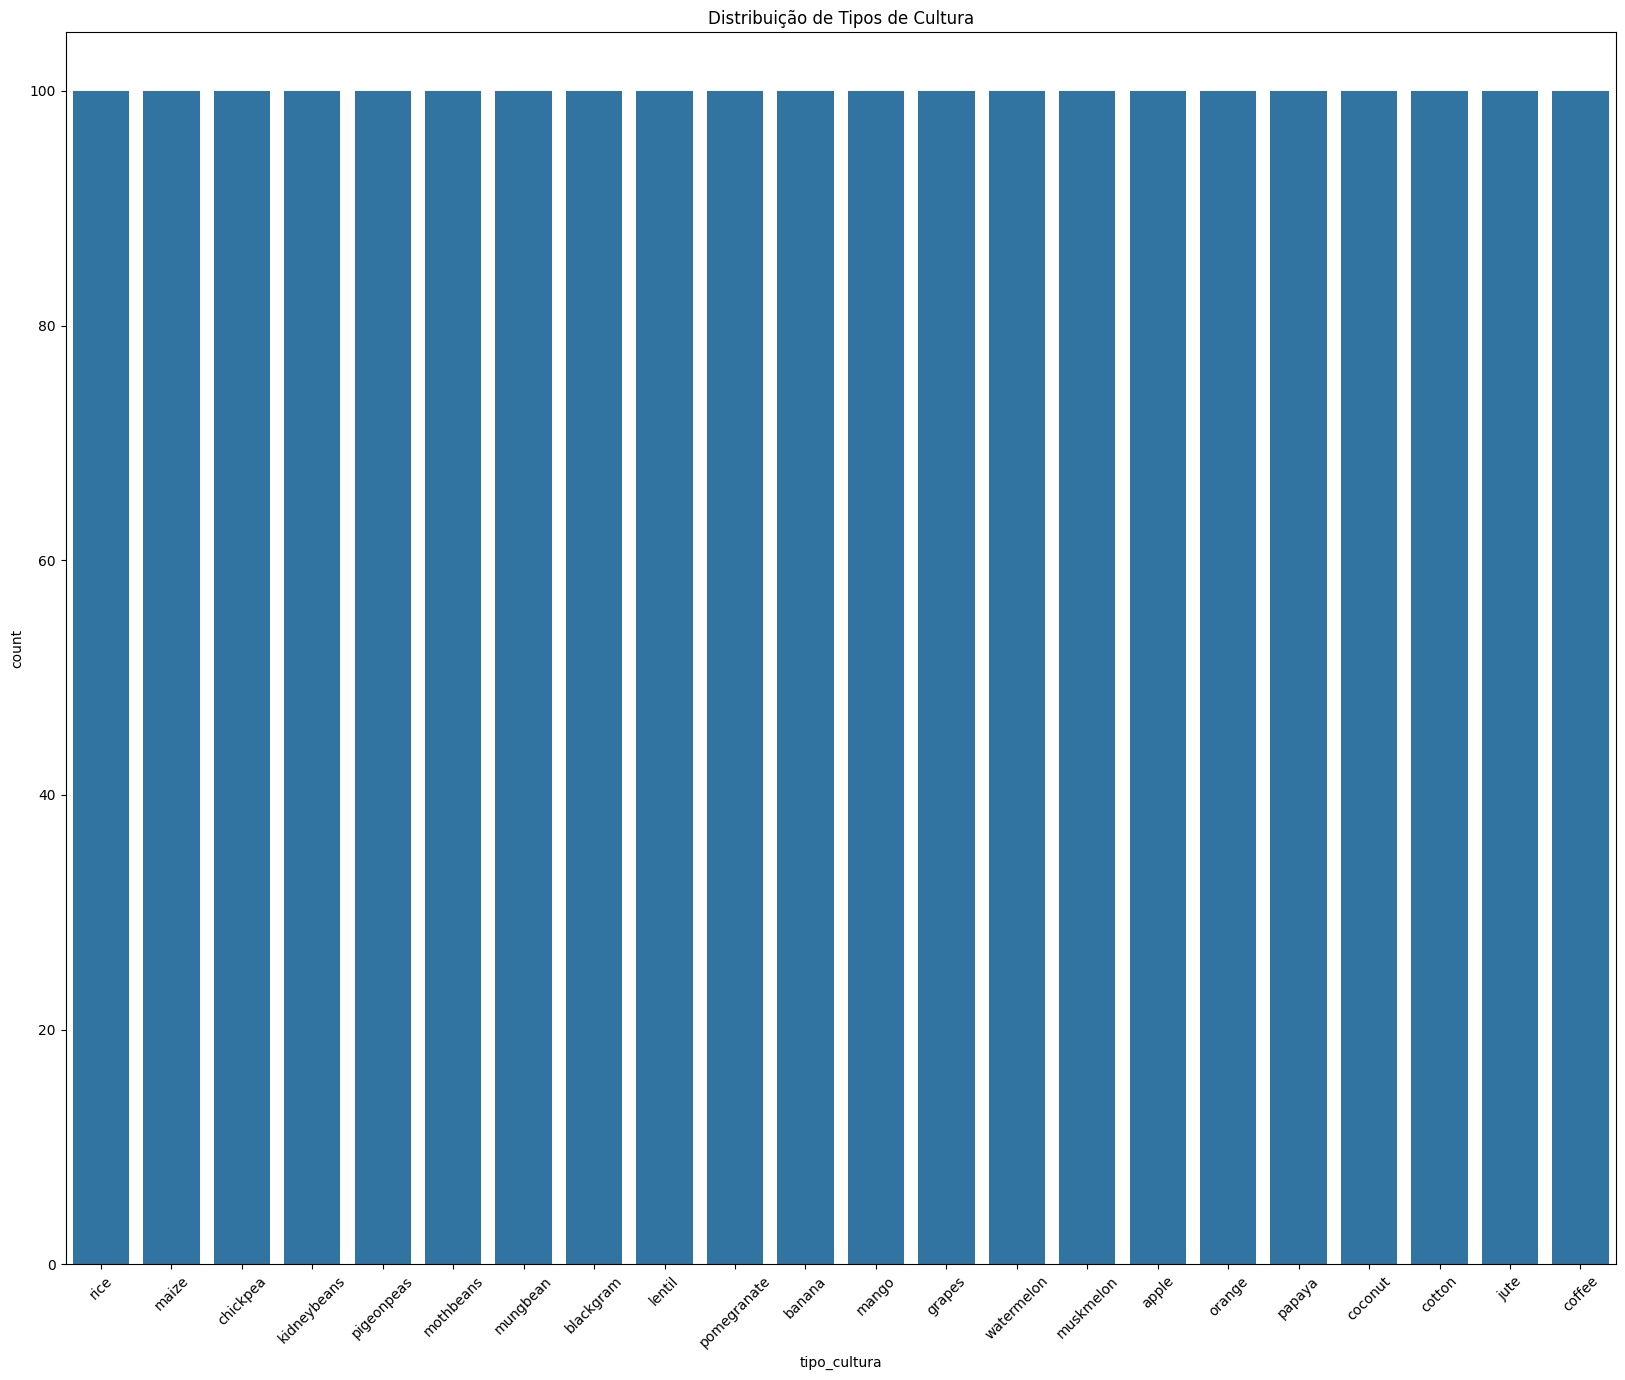

In [10]:
plt.figure(figsize=(20, 16))
sns.countplot(x ='tipo_cultura', data = df)
plt.title('Distribuição de Tipos de Cultura')
plt.xticks(rotation=45)
plt.show()

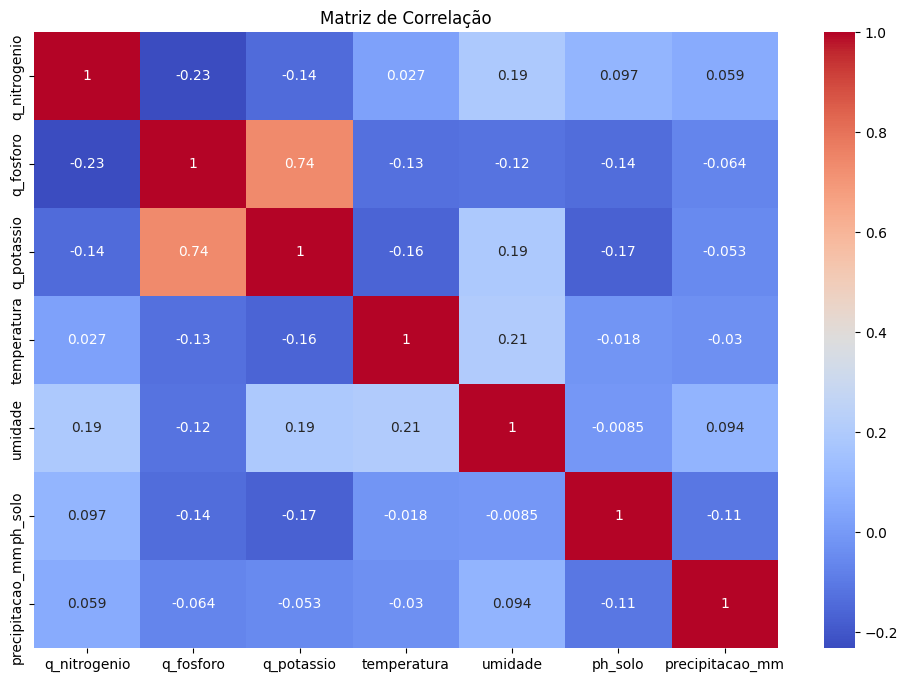

In [14]:
# Correlação entre as features numéricas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=numerics).corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

In [11]:
X = df[['q_nitrogenio', 'q_fosforo', 'q_potassio', 'temperatura', 'umidade', 'ph_solo', 'precipitacao_mm']]
y = df['tipo_cultura']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
modelos = {
    "KNN": KNeighborsClassifier(),
    "Árvore de Decisão": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Regressão Logística": LogisticRegression(max_iter=1000),
    "SVM": SVC()
}


In [20]:
resultados = {}


for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    resultados[nome] = acc

    print(f"\n🔹 Modelo: {nome}")
    print("Acurácia:", round(acc, 4))
    print("\nMatriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))


print("\n RESULTADO FINAL ")
for nome, acc in resultados.items():
    print(f"{nome}: {round(acc*100, 2)}%")



🔹 Modelo: KNN
Acurácia: 0.9545

Matriz de Confusão:
[[29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  3  0  0 22  0  0 

In [21]:
# Distribuição das culturas no conjunto de teste
dist_teste = (
    pd.DataFrame(y_test, columns=["tipo_cultura"])
      .value_counts()
      .reset_index(name="Quantidade")
      .sort_values(by="Quantidade", ascending=False)
)

print(dist_teste)


   tipo_cultura  Quantidade
0    pigeonpeas          34
1      chickpea          31
2        papaya          31
3   pomegranate          30
4         apple          29
5       coconut          27
6         mango          27
7          jute          27
8        coffee          26
9      mungbean          26
10    mothbeans          26
11         rice          25
12  kidneybeans          24
13    blackgram          24
14       banana          23
15        maize          23
16    muskmelon          22
17       cotton          21
18   watermelon          21
19       grapes          19
20       orange          19
21       lentil          15
